### Import/Install Libraries

In [681]:
# !pip install -r requirements.txt

In [714]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
import pickle
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /Users/gmondaut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gmondaut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/gmondaut/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Load the data

In [715]:
data = pd.read_csv('train.csv')
professioni = pd.read_csv('professioni.csv')

In [716]:
print('Job Vacancies')
data.head()

Job Vacancies


,Fonte,Job_Description,Role
0,Randstad Technical,Randstad Technical di Vimercate seleziona un m...,Manutentore elettromeccanico
1,Monster,Ricerchiamo N. 5 ricerca ADDETTI/E VENDITA per...,Commessa
2,Monster,"Quanta SpA, Filiale di Verona, seleziona per a...",Manutentore elettromeccanico
3,Monster,"Kelly Services, multinazionale americana leade...",Tecnico elettromeccanico
4,Monster,ADHR Filiale di Torino ricerca per azienda cli...,Data Scientist


In [717]:
print('Professioni')
professioni.head()

Professioni


,Group,Subgroup,Descrizione_professione,Descrizione_professione2,subgroup1,subgroup2,Esco_Abilit_compet_essenz,Esco_conoscenze_essenz,Esco_Abilit_compet_opz,Conoscenze
0,Statistici,Attuario\nData scientist\nEsperto in ricerca o...,Accertamenti tecnici per la valutazione delle ...,Elaborare piani tecnici per la trasformazione ...,consulente attuariale\ndemografo demografa\nsp...,consulente attuariale\ndemografo demografa\nsp...,correggere i dati\ncostruire sistemi di raccom...,classificazione delle informazioni\nelaborazio...,creare modelli di dati\ndefinire criteri di qu...,LDAP\nLINQ\nMDX\nN1QL\nSPARQL\nXQuery\nbusines...
1,Cuochi in alberghi e ristoranti,Aiuto cuoco\nAiuto cuoco di ristorante\nAntipa...,Allestimento dei piatti\nApplicazione delle pr...,Effettuare la preparazione dell'impasto da piz...,capo chef pasticcere capo chef pasticcera\nche...,addetta alla preparazione degli alimenti\ncuoc...,consegnare la zona di preparazione di alimenti...,"legislazione in materia di salute, sicurezza e...",NaN,NaN
2,Commessi alle vendite al minuto,Addetto al banco vendita di macelleria\nAddett...,Allestimento degli scaffali e delle isole prom...,Allestire e rifornire gli scaffali e le isole ...,commesso di negozio di abbigliamento commessa ...,commessa di negozio di abbigliamento uomo donn...,applicare le competenze matematiche\nconsiglia...,argomentazione di vendita\ncaratteristiche dei...,eseguire piccoli interventi di sartoria,industria dell'abbigliamento
3,Elettromeccanici,Aggiustatore elettromeccanico\nAvvolgitore di ...,Cablatura dell'impianto elettrico\nCollaudo de...,Effettuare la diagnosi tecnica (strumentale e ...,manutentore elettromeccanico manutentrice elet...,elettricista a bordo macchina\nelettricista-me...,adattare le attrezzature meccanizzate\napplica...,elettricità\nelettromeccanica\nelettronica\nme...,applicare un rivestimento alle apparecchiature...,accessori per cavi elettrici\ncomponenti di ba...


### Text Preprocessing on Professioni csv

In [718]:
# professoni.Subgroup = professioni.Subgroup.apply(lambda x: re.sub("[^a-zA-Z]", "", x))
# letters = re.sub("[^a-zA-Z]", "", x)
# letters = letters.lower()
professioni.Subgroup = professioni.Subgroup.apply(lambda x: x.lower().split('\n'))
professioni.subgroup1 = professioni.subgroup1.apply(lambda x: x.lower().split('\n'))
professioni.subgroup2 = professioni.subgroup2.apply(lambda x: x.lower().split('\n'))
professioni.Subgroup = professioni.Subgroup + professioni.subgroup1 + professioni.subgroup2
professioni.Subgroup = professioni.Subgroup.apply(lambda x: list(set(x)))

# professioni.Subgroup_add_info = professioni.Subgroup.apply(lambda x: [word_tokenize(i) for i in x])
# # professioni.Subgroup_add_info = professioni.Subgroup.apply(lambda x: set([i for t in x for i in t]))
# professioni.Subgroup = professioni.Subgroup + professioni.Subgroup_add_info

### Create a dictionary for professioni. e.g. 
{Statistici : ['attuario', 'data scientist', 'esperto in ricerca operativa',..... ]}

In [719]:
professioni_dictionary = pd.Series(professioni.Subgroup.values,index=professioni.Group).to_dict()
# to remove empty space from the subgroup list of values
for i in range(0,professioni.Subgroup.shape[0]):
    while("" in professioni.Subgroup.iloc[i]) : 
        professioni.Subgroup.iloc[i].remove("") 

In [720]:
professioni_dictionary # prefessioni dictionary

{'Statistici': ['esperto in ricerca operativa',
  'demografo demografa',
  'statistico statistica',
  'statistico',
  'consulente attuariale',
  'statistico esperto in controlli di qualità',
  'data scientist',
  'statistico economico',
  'statistico metodologico',
  'statistico applicato',
  'specialista in biometria',
  'statistici',
  'esperto ricerca operativa',
  'attuario'],
 'Cuochi in alberghi e ristoranti': ['chef privato',
  'cuoco cuoca',
  'cuoco di partita di zuppe',
  'addetto alla preparazione della pizza',
  'cuochi in alberghi e ristoranti',
  ' cuoco gelatiere',
  'cuoco al frigorifero',
  'cuoco specializzato in cucina dietetica',
  'cuoco',
  'addetto alla preparazione degli alimenti',
  'cuoco di partita di pesce cuoca di partita di pesce',
  'pasticcera',
  'cuoco esperto in dietetica',
  'pizzaiola',
  'cuoca di partita di pesce',
  'cuoca in dietetica',
  'aiuto cuoco',
  'cuoco specializzato in cucina di pesce',
  'cuoco di ristorante',
  'cuoca',
  'capo pasti

In [721]:
subgroup_dict = {}
for group, subgroups in professioni_dictionary.items():
    for subgroup in subgroups:
        subgroup_dict[subgroup] = group
subgroup_dict

{'esperto in ricerca operativa': 'Statistici',
 'demografo demografa': 'Statistici',
 'statistico statistica': 'Statistici',
 'statistico': 'Statistici',
 'consulente attuariale': 'Statistici',
 'statistico esperto in controlli di qualità': 'Statistici',
 'data scientist': 'Statistici',
 'statistico economico': 'Statistici',
 'statistico metodologico': 'Statistici',
 'statistico applicato': 'Statistici',
 'specialista in biometria': 'Statistici',
 'statistici': 'Statistici',
 'esperto ricerca operativa': 'Statistici',
 'attuario': 'Statistici',
 'chef privato': 'Cuochi in alberghi e ristoranti',
 'cuoco cuoca': 'Cuochi in alberghi e ristoranti',
 'cuoco di partita di zuppe': 'Cuochi in alberghi e ristoranti',
 'addetto alla preparazione della pizza': 'Cuochi in alberghi e ristoranti',
 'cuochi in alberghi e ristoranti': 'Cuochi in alberghi e ristoranti',
 ' cuoco gelatiere': 'Cuochi in alberghi e ristoranti',
 'cuoco al frigorifero': 'Cuochi in alberghi e ristoranti',
 'cuoco specializ

In [722]:
# example of subgroup roles
professioni

,Group,Subgroup,Descrizione_professione,Descrizione_professione2,subgroup1,subgroup2,Esco_Abilit_compet_essenz,Esco_conoscenze_essenz,Esco_Abilit_compet_opz,Conoscenze
0,Statistici,"[esperto in ricerca operativa, demografo demog...",Accertamenti tecnici per la valutazione delle ...,Elaborare piani tecnici per la trasformazione ...,"[consulente attuariale, demografo demografa, s...","[consulente attuariale, demografo demografa, s...",correggere i dati\ncostruire sistemi di raccom...,classificazione delle informazioni\nelaborazio...,creare modelli di dati\ndefinire criteri di qu...,LDAP\nLINQ\nMDX\nN1QL\nSPARQL\nXQuery\nbusines...
1,Cuochi in alberghi e ristoranti,"[chef privato, cuoco cuoca, cuoco di partita d...",Allestimento dei piatti\nApplicazione delle pr...,Effettuare la preparazione dell'impasto da piz...,"[capo chef pasticcere capo chef pasticcera, ch...","[addetta alla preparazione degli alimenti, cuo...",consegnare la zona di preparazione di alimenti...,"legislazione in materia di salute, sicurezza e...",NaN,NaN
2,Commessi alle vendite al minuto,"[addetto al banco vendita di panetteria, ausil...",Allestimento degli scaffali e delle isole prom...,Allestire e rifornire gli scaffali e le isole ...,[commesso di negozio di abbigliamento commessa...,[commessa di negozio di abbigliamento uomo don...,applicare le competenze matematiche\nconsiglia...,argomentazione di vendita\ncaratteristiche dei...,eseguire piccoli interventi di sartoria,industria dell'abbigliamento
3,Elettromeccanici,[installatore di impianti elettromeccanici ed ...,Cablatura dell'impianto elettrico\nCollaudo de...,Effettuare la diagnosi tecnica (strumentale e ...,[manutentore elettromeccanico manutentrice ele...,"[elettricista a bordo macchina, elettricista-m...",adattare le attrezzature meccanizzate\napplica...,elettricità\nelettromeccanica\nelettronica\nme...,applicare un rivestimento alle apparecchiature...,accessori per cavi elettrici\ncomponenti di ba...


In [723]:
data['Target'] = data['Role'].apply(lambda x: subgroup_dict.get(x.lower().strip(),'Unknown'))
data.head()

,Fonte,Job_Description,Role,Target
0,Randstad Technical,Randstad Technical di Vimercate seleziona un m...,Manutentore elettromeccanico,Elettromeccanici
1,Monster,Ricerchiamo N. 5 ricerca ADDETTI/E VENDITA per...,Commessa,Unknown
2,Monster,"Quanta SpA, Filiale di Verona, seleziona per a...",Manutentore elettromeccanico,Elettromeccanici
3,Monster,"Kelly Services, multinazionale americana leade...",Tecnico elettromeccanico,Unknown
4,Monster,ADHR Filiale di Torino ricerca per azienda cli...,Data Scientist,Statistici


### Text Preprocessing on Job Descripion column

##### Tokenization
split the text into words

In [724]:
# remove punctuation
data.Job_Description = data.Job_Description.apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
data.Target = data.Target.apply(lambda x: x.lower())
data.Job_Description = data['Job_Description'].apply(lambda x: word_tokenize(x.lower())) # lowercase each word
data.head()

,Fonte,Job_Description,Role,Target
0,Randstad Technical,"[randstad, technical, di, vimercate, seleziona...",Manutentore elettromeccanico,elettromeccanici
1,Monster,"[ricerchiamo, n, ricerca, addetti, e, vendita,...",Commessa,unknown
2,Monster,"[quanta, spa, filiale, di, verona, seleziona, ...",Manutentore elettromeccanico,elettromeccanici
3,Monster,"[kelly, services, multinazionale, americana, l...",Tecnico elettromeccanico,unknown
4,Monster,"[adhr, filiale, di, torino, ricerca, per, azie...",Data Scientist,statistici


##### remove words with lenght < 3 (e.g. numbers and not meaningful words)

In [725]:
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if len(i) >3])
data.Job_Description.head() # note the word 'vimercate' in row = 0

0    [randstad, technical, vimercate, seleziona, ma...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [quanta, filiale, verona, seleziona, azienda, ...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

#### Stemming / Lemmatization 

Stemming: Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi 

Lemmatization: Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".


In [605]:
# decide if to use this or not
# stemmer = nltk.stem.snowball.ItalianStemmer(ignore_stopwords=False)

In [606]:
# example:
# print('ricercare -->',stemmer.stem('ricercare'))
# print('ricerca -->', stemmer.stem('ricerca'))

ricercare --> ricerc
ricerca --> ricerc


In [712]:
# data.Job_Description = data.Job_Description.apply(lambda x: list(set([stemmer.stem(i) for i in x])))
# data.Job_Description.head()

0    [turn, nell, meccan, gomm, manutentor, randsta...
1    [preferibil, arezz, ricerc, disponibilit, nell...
2    [turn, luog, manutentor, settor, lavor, richie...
3    [automun, livell, offert, tratter, lavor, scor...
4    [inoltr, settor, lavor, machin, gestion, dat, ...
Name: Job_Description, dtype: object

### Remove Noisy

In [726]:
##### remove in 'job_description' words from 'fonte'
data.Fonte = data.Fonte.apply(lambda x: word_tokenize(x))
source = set([i.lower() for x in data.Fonte for i in x])
data = data.drop('Fonte', axis = 1)
source

{'infojob', 'monster', 'randstad', 'technical'}

In [728]:
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if i not in source])
data.Job_Description.head(5) # compare row 0 with previous row

0    [vimercate, seleziona, manutentore, inseriment...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [quanta, filiale, verona, seleziona, azienda, ...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

##### Stopwords
Stopwords are words generally not relevant to a text; thereby we get rid of them

In [729]:
list_stopwords = list(set(stopwords.words('italian')))
print('Example of stopwords:',list_stopwords[:20])
print(10 * '%')
print('lenth of stopwords: {}'.format(len(list_stopwords)))

Example of stopwords: ['sulle', 'agl', 'c', 'ebbi', 'sarebbero', 'fossi', 'essendo', 'quello', 'avreste', 'stavo', 'avemmo', 'sono', 'stava', 'quella', 'loro', 'o', 'li', 'stavi', 'ma', 'di']
%%%%%%%%%%
lenth of stopwords: 279


In [730]:
data.Job_Description = data.Job_Description.apply(lambda x: [i for i in x if i not in list_stopwords] )
data.Job_Description.head(5)


0    [vimercate, seleziona, manutentore, inseriment...
1    [ricerchiamo, ricerca, addetti, vendita, punto...
2    [filiale, verona, seleziona, azienda, cliente,...
3    [kelly, services, multinazionale, americana, l...
4    [adhr, filiale, torino, ricerca, azienda, clie...
Name: Job_Description, dtype: object

###### Get a list of uniquewords

In [731]:
words = []
for i in data.Job_Description:
    words.append(i)
word_list = set([i for x in words for i in x])

In [732]:
# check the frequence distribution of words
fdist = nltk.FreqDist(word_list)
sorted(fdist.items())[:20]

[('abbigliamento', 1),
 ('abruzzo', 1),
 ('accessori', 1),
 ('acquisizione', 1),
 ('addetti', 1),
 ('adhr', 1),
 ('advanced', 1),
 ('affini', 1),
 ('agenzia', 1),
 ('aiutare', 1),
 ('aiuto', 1),
 ('alcune', 1),
 ('alcuni', 1),
 ('alimentare', 1),
 ('alloggio', 1),
 ('almeno', 1),
 ('ambito', 1),
 ('ambiziose', 1),
 ('americana', 1),
 ('analisi', 1)]

In [733]:
# wordcloud of main words
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [746]:
job_description = data['Job_Description'].apply(lambda x: ' '.join(x))
job_description.head(2)

0    vimercate seleziona manutentore inserimento so...
1    ricerchiamo ricerca addetti vendita punto vend...
Name: Job_Description, dtype: object

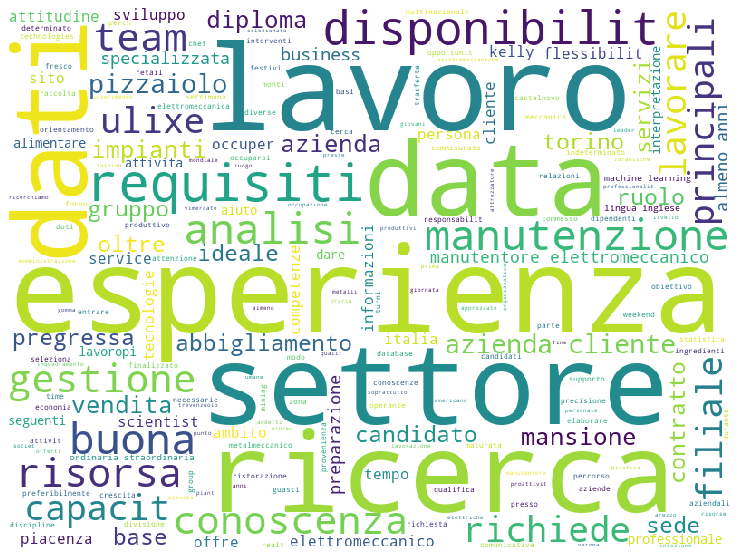

In [747]:
cloud(' '.join(job_description))

#### Remove words referring to: Comuni, Provincie, Regioni

In [748]:
# load a text file containing a list of 'Comuni, Provincie, Regioni' italiane
geo_data = pd.read_fwf('listacomuni.txt')
geo_data.to_csv('listacomuni.csv')
geo_data = pd.read_csv('listacomuni.csv', sep=';')
geo_data.head()

,",Istat",Comune,Provincia,Regione,Prefisso,CAP,CodFisco,Abitanti,Link
0,"0,028001",Abano Terme,PD,VEN,49,35031,A001,19726,http://www.comuni-italiani.it/028/001/
1,"1,098001",Abbadia Cerreto,LO,LOM,371,26834,A004,293,http://www.comuni-italiani.it/098/001/
2,"2,097001",Abbadia Lariana,LC,LOM,341,23821,A005,3305,http://www.comuni-italiani.it/097/001/
3,"3,052001",Abbadia San Salvatore,SI,TOS,577,53021,A006,6722,http://www.comuni-italiani.it/052/001/
4,"4,095001",Abbasanta,OR,SAR,785,09071,A007,2872,http://www.comuni-italiani.it/095/001/


In [749]:
comune = [i.lower() for i in geo_data.Comune]
geo_data.Provincia = geo_data.Provincia.apply(lambda x: str(x))
provincia = [i.lower() for i in geo_data.Provincia]
regione = [i.lower() for i in geo_data.Regione]
print('Comuni samples:',comune[:10])
print(20*'%')
print('Provincia samples:',provincia[:10])
print(20*'%')
print('Regione samples:',regione[:10])

Comuni samples: ['abano terme', 'abbadia cerreto', 'abbadia lariana', 'abbadia san salvatore', 'abbasanta', 'abbateggio', 'abbiategrasso', 'abetone', 'abriola', 'acate']
%%%%%%%%%%%%%%%%%%%%
Provincia samples: ['pd', 'lo', 'lc', 'si', 'or', 'pe', 'mi', 'pt', 'pz', 'rg']
%%%%%%%%%%%%%%%%%%%%
Regione samples: ['ven', 'lom', 'lom', 'tos', 'sar', 'abr', 'lom', 'tos', 'bas', 'sic']


In [750]:
# example
print('verona' in comune)
print('trieste' in comune)
print('dublino' in comune)

True
True
False


##### Wrap previous commands into below function

In [751]:
def remove_comuni(data, column, geo_data):
    ''' function to remove geographic noisy'''
    comune = [i.lower() for i in geo_data.Comune]
    geo_data.Provincia = geo_data.Provincia.apply(lambda x: str(x))
    provincia = [i.lower() for i in geo_data.Provincia]
    regione = [i.lower() for i in geo_data.Regione]
    
    data[column] = data[column].apply(lambda x: [i for i in x if i not in comune])
    data[column] = data[column].apply(lambda x: [i for i in x if i not in provincia])
    data[column] = data[column].apply(lambda x: [i for i in x if i not in regione])
    
    return data


In [752]:
data = remove_comuni(data, 'Job_Description', geo_data)
data.head(5)

,Job_Description,Role,Target
0,"[seleziona, manutentore, inserimento, somminis...",Manutentore elettromeccanico,elettromeccanici
1,"[ricerchiamo, ricerca, addetti, vendita, punto...",Commessa,unknown
2,"[filiale, seleziona, azienda, cliente, settore...",Manutentore elettromeccanico,elettromeccanici
3,"[kelly, services, multinazionale, americana, l...",Tecnico elettromeccanico,unknown
4,"[adhr, filiale, ricerca, azienda, cliente, set...",Data Scientist,statistici


##### Get rid of unusual_words : misspelled words - uncommon words¶

In [753]:
italian_vocab = pd.read_fwf('660000_parole_italiane.txt', names = ['word'])
italian_vocab = set(italian_vocab.word.tolist())
english_vocab = sorted(set(w.lower() for w in nltk.corpus.words.words())) # english vocabulary

In [754]:
def uncommon_words(data,column, italian_vocab, english_vocab = None):
    data[column] = data[column].apply(lambda x: [i for i in x if i in italian_vocab])
    return data

In [755]:
data = uncommon_words(data, 'Job_Description', italian_vocab, english_vocab)
data # note that the word 'vimercate' is not present anymore 

,Job_Description,Role,Target
0,"[seleziona, manutentore, inserimento, presso, ...",Manutentore elettromeccanico,elettromeccanici
1,"[ricerchiamo, ricerca, addetti, vendita, punto...",Commessa,unknown
2,"[filiale, seleziona, azienda, cliente, settore...",Manutentore elettromeccanico,elettromeccanici
3,"[multinazionale, americana, leader, risorse, u...",Tecnico elettromeccanico,unknown
4,"[filiale, ricerca, azienda, cliente, settore, ...",Data Scientist,statistici
5,"[cercando, data, esperto, appassionato, unisca...",Data Scientist,statistici
6,"[elea, ricerca, azienda, cliente, figura, prof...",Pizzaiolo,cuochi in alberghi e ristoranti
7,"[ricerca, propri, resort, puglia, chef, cuoco,...",Pizzaiolo Pasticcere Macellaio,unknown
8,"[esclusiva, boutique, sita, isola, isole, eoli...",Commessa,unknown
9,"[cliente, guelfo, ricerca, commesso, abbigliam...",Commessa,unknown


                              Frequency
MANUTENTORE ELETTROMECCANICO           
settore                               6
manutentore                           5
manutenzione                          5
esperienza                            5
impianti                              4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
               Frequency
COMMESSA                
vendita                4
abbigliamento          4
ricerca                2
esperienza             2
settore                2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                          Frequency
TECNICO ELETTROMECCANICO           
anni                              3
oltre                             2
servizi                           2
ricerca                           2
almeno                            2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

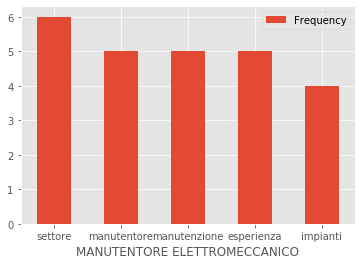

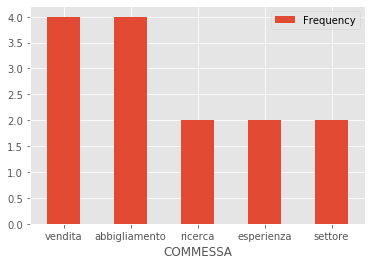

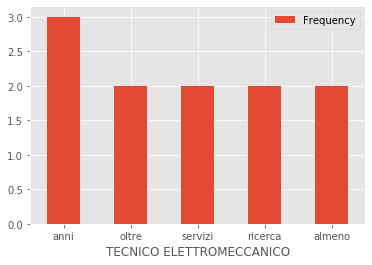

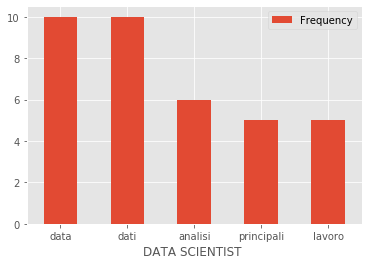

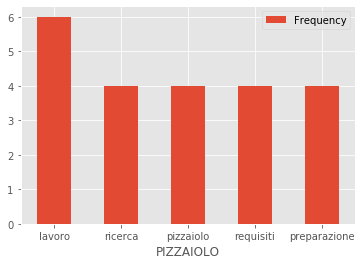

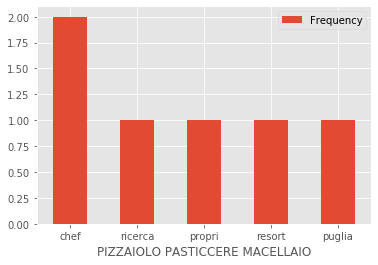

In [758]:
%matplotlib inline
matplotlib.style.use('ggplot')
field = "Job_Description"
Role = list(data.Role.unique())
for i in Role:
    txt = data[data['Role']==i][field]
    txt = [i for x in txt.tolist() for i in x]
    words_except_stop_dist = nltk.FreqDist(w for w in txt) 
    words_except_stop_dist
    rslt = pd.DataFrame(words_except_stop_dist.most_common(5),
                            columns=[i.upper(), 'Frequency']).set_index(i.upper())
    print(rslt)
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)
    print(100 *'%')

##### Create Role dictionary and encode the column Role

In [773]:
Role_dictionary = pd.Series(data['Target'].unique()).to_dict()
Role_dictionary = dict([(value, key) for key, value in Role_dictionary.items()])

In [774]:
Role_dictionary

{'elettromeccanici': 0,
 'unknown': 1,
 'statistici': 2,
 'cuochi in alberghi e ristoranti': 3}

In [775]:
# save role dictionary as picke file
with open('Role_dictionary.pickle', 'wb') as handle:
    pickle.dump(Role_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('Role_dictionary.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [778]:
role_encoded = []
for i in data.Target:
    role_encoded.append(Role_dictionary.get(i, None))

In [779]:
print(role_encoded)
print(10 *'%')
print(data.Role.tolist())

[0, 1, 0, 1, 2, 2, 3, 1, 1, 1, 0, 2, 3, 3]
%%%%%%%%%%
['Manutentore elettromeccanico', 'Commessa', 'Manutentore elettromeccanico', 'Tecnico elettromeccanico', 'Data Scientist ', 'Data Scientist ', 'Pizzaiolo', 'Pizzaiolo Pasticcere Macellaio', 'Commessa', 'Commessa', 'Manutentore elettromeccanico', 'Data Scientist ', 'Pizzaiolo', 'Pizzaiolo']


In [780]:
##### replace old role values with new values
data.Role = role_encoded

In [781]:
data.head()

,Job_Description,Role,Target
0,"[seleziona, manutentore, inserimento, presso, ...",0,elettromeccanici
1,"[ricerchiamo, ricerca, addetti, vendita, punto...",1,unknown
2,"[filiale, seleziona, azienda, cliente, settore...",0,elettromeccanici
3,"[multinazionale, americana, leader, risorse, u...",1,unknown
4,"[filiale, ricerca, azienda, cliente, settore, ...",2,statistici


#### have a look at bigrams

In [782]:
data.Job_Description

0     [seleziona, manutentore, inserimento, presso, ...
1     [ricerchiamo, ricerca, addetti, vendita, punto...
2     [filiale, seleziona, azienda, cliente, settore...
3     [multinazionale, americana, leader, risorse, u...
4     [filiale, ricerca, azienda, cliente, settore, ...
5     [cercando, data, esperto, appassionato, unisca...
6     [elea, ricerca, azienda, cliente, figura, prof...
7     [ricerca, propri, resort, puglia, chef, cuoco,...
8     [esclusiva, boutique, sita, isola, isole, eoli...
9     [cliente, guelfo, ricerca, commesso, abbigliam...
10    [divisione, specializzata, ricerca, selezione,...
11    [agenzia, lavoro, ricerca, azienda, cliente, s...
12    [descrizione, azienda, filiale, divisione, spe...
13    [filiale, crostolo, ricerca, aiuto, pizzaiolo,...
Name: Job_Description, dtype: object

In [783]:
from nltk import bigrams, collocations
Text = data.Job_Description.iloc[1]
bigrams_from_text = bigrams(Text)
list(bigrams_from_text)[:6]

[('ricerchiamo', 'ricerca'),
 ('ricerca', 'addetti'),
 ('addetti', 'vendita'),
 ('vendita', 'punto'),
 ('punto', 'vendita'),
 ('vendita', 'abbigliamento')]

In [784]:
bigrams_from_text = bigrams(Text)
list(iter(dict(nltk.FreqDist(i for i in list(bigrams_from_text))).items()))[:6]

[(('ricerchiamo', 'ricerca'), 1),
 (('ricerca', 'addetti'), 1),
 (('addetti', 'vendita'), 1),
 (('vendita', 'punto'), 1),
 (('punto', 'vendita'), 1),
 (('vendita', 'abbigliamento'), 1)]

##### convert each word tokenized into a string of words

In [788]:
#### to avoid problems with plurals/gender
# data.Job_Description.apply(lambda x: [i[:-1] for i in x] )

In [789]:
data.Job_Description = data.Job_Description.apply(lambda x: ' '.join(x))
data.Job_Description.head()

0    seleziona manutentore inserimento presso azien...
1    ricerchiamo ricerca addetti vendita punto vend...
2    filiale seleziona azienda cliente settore meta...
3    multinazionale americana leader risorse umane ...
4    filiale ricerca azienda cliente settore inform...
Name: Job_Description, dtype: object

### Data Split 

In [791]:
X_train, X_test, y_train, y_test = train_test_split(data['Job_Description'], 
                                                    data['Role'])

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 14
Number of rows in the training set: 10
Number of rows in the test set: 4


### Bag of Words processing to our dataset

In [792]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [793]:
training_data.toarray().shape

(10, 382)

In [794]:
print('training data',training_data.shape)
print('testing data',testing_data.shape)

training data (10, 382)
testing data (4, 382)


### Naive Bayes implementation

In [795]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [796]:
def get_key(value, dictionary):
    for k,v in dictionary.items():
        if value == v:
            return k

In [797]:
predictions = naive_bayes.predict(testing_data)
predictions_keys = []
for i in predictions:
    predictions_keys.append(get_key(i,Role_dictionary))
print('Prediction for rows {} are \n {}'.format(X_test.index.tolist(),predictions_keys))

print(100*'%')
actual_predictions = []
for i in y_test.tolist():
    actual_predictions.append(get_key(i,Role_dictionary))
print('actual predictions are: \n {}'.format(actual_predictions))

Prediction for rows [0, 2, 4, 13] are 
 ['elettromeccanici', 'cuochi in alberghi e ristoranti', 'statistici', 'cuochi in alberghi e ristoranti']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
actual predictions are: 
 ['elettromeccanici', 'elettromeccanici', 'statistici', 'cuochi in alberghi e ristoranti']


In [798]:
# check the accuracy of our model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))

Accuracy score:  0.75
